# CS210 Group Project | Spring 2019

### Kemal Sarper Yücel
### Oğuzhan Özdemir
### Mert Atabey Dinçer


# Effects of Various Player Stats on the Player’s Position

    In this project, we aspire to determine if a player’s position can be accurately guessed by looking at the player’s stats. The stats we will be looking at are:
    
    1) Field Goal Percentage
    2) Assists
    3) Steals
    4) Blocks
    5) Free Throw Percentage
    6) 2-Point Accuracy
    7) 3-Point Accuracy
    8) Offensive Rebounds
    9) Defensive Rebounds
    10) Minutes Played
    11) Turnover
    12) Points

We will be working with the data from 1985 to 2018 
The remaining details are in the proposal.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime
from os.path import join
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime
from os.path import join
%matplotlib inline
d_path = "/Users/Sarper"
filename = "Seasons_Stats.csv"

df = pd.read_csv(join(d_path, filename))

df.head()

,index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MVP
0,0,1985,Kareem Abdul-Jabbar*,C,37,LAL,79,79,2630,22.9,...,162,460,622,249,63,162,197,238,1735,0
1,1,1985,Alvan Adams,PF,30,PHO,82,69,2136,19.8,...,153,347,500,308,115,48,197,254,1202,0
2,2,1985,Mark Aguirre,SF,25,DAL,80,79,2699,21.3,...,188,289,477,249,60,24,253,250,2055,0
3,3,1985,Danny Ainge,SG,25,BOS,75,73,2564,14.2,...,76,192,268,399,122,6,149,228,971,0
4,4,1985,Chuck Aleksinas,C,25,GSW,74,4,1114,9.1,...,87,183,270,36,15,15,72,171,377,0


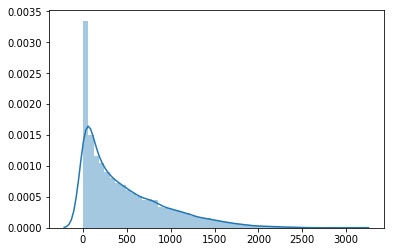

In [2]:
sns.distplot(df["PTS"].values, norm_hist=True)
plt.show()


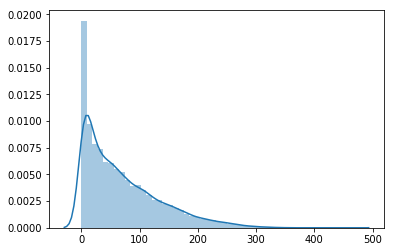

In [3]:
sns.distplot(df["TOV"].values, norm_hist=True)
plt.show()

Text(0.5, 1.0, 'PTS vs POS')

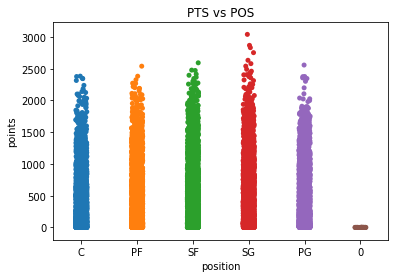

In [4]:
ax=sns.stripplot(df["Pos"],df["PTS"]);
ax.set(xlabel="position", ylabel="points")
plt.title("PTS vs POS")

Text(0.5, 1.0, 'TOV vs POS')

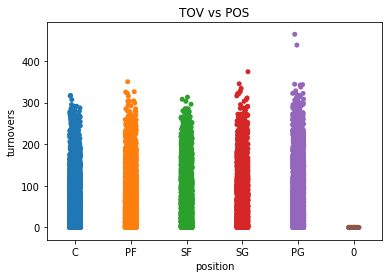

In [5]:
ax=sns.stripplot(df["Pos"],df["TOV"]);
ax.set(xlabel="position", ylabel="turnovers")
plt.title("TOV vs POS")

Text(0.5, 1.0, 'BLK vs POS')

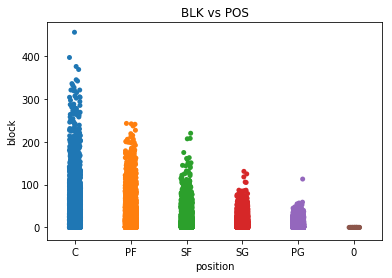

In [6]:
ax=sns.stripplot(df["Pos"],df["BLK"]);
ax.set(xlabel="position", ylabel="block")
plt.title("BLK vs POS")

In [7]:
print("Phase 2: Statistical Analysis")
print("Exploration and Description of the Dataset")
df.describe()


Phase 2: Statistical Analysis
Exploration and Description of the Dataset


,index,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MVP
count,17132.000000,17132.000000,17132.000000,17132.000000,17132.000000,17132.000000,17132.000000,17132.000000,17132.000000,17132.000000,...,17132.000000,17132.000000,17132.00000,17132.000000,17132.000000,17132.000000,17132.000000,17132.000000,17132.000000,17132.000000
mean,8565.500000,1998.484824,26.870009,48.857168,23.330784,1142.256362,12.342634,0.500355,0.171461,0.316136,...,57.888046,141.748074,199.63612,107.237334,37.663145,23.578333,69.501401,104.640205,473.420616,0.002043
std,4945.726741,86.954907,4.220400,26.673972,28.483927,922.000874,6.324181,0.103685,0.191223,0.234649,...,64.520183,140.752267,199.63992,136.316921,37.145401,35.812860,64.754136,78.914204,472.965996,0.045154
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4282.750000,1994.000000,24.000000,25.000000,0.000000,296.000000,9.600000,0.471000,0.006000,0.192000,...,11.000000,31.000000,44.00000,15.000000,8.000000,3.000000,16.000000,33.000000,89.000000,0.000000
50%,8565.500000,2003.000000,26.000000,53.000000,8.000000,955.000000,12.600000,0.516000,0.090000,0.284000,...,34.000000,102.000000,141.00000,58.000000,27.000000,11.000000,52.000000,95.000000,324.000000,0.000000
75%,12848.250000,2010.000000,30.000000,74.000000,44.000000,1860.250000,15.600000,0.551000,0.308000,0.393000,...,84.000000,207.000000,290.00000,145.000000,56.000000,29.000000,106.000000,164.000000,730.000000,0.000000
max,17131.000000,2017.000000,44.000000,85.000000,83.000000,3533.000000,129.100000,1.136000,1.000000,6.000000,...,523.000000,1007.000000,1530.00000,1164.000000,301.000000,456.000000,464.000000,371.000000,3041.000000,1.000000


In [8]:
df.dtypes

index       int64
Year        int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP          int64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
eFG%      float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
MVP         int64
dtype: object

In [9]:
posnum = []
for pos in df["Pos"]:
    if pos == 'PG':
        posnum.append(1)
    elif pos == 'SG':
        posnum.append(2)
    elif pos == 'SF':
        posnum.append(3)
    elif pos == 'PF':
        posnum.append(4)
    else:
        posnum.append(5)
ntpos = np.array(posnum)
df['PosNum'] = ntpos
df.head(999999)

,index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MVP,PosNum
0,0,1985,Kareem Abdul-Jabbar*,C,37,LAL,79,79,2630,22.9,...,460,622,249,63,162,197,238,1735,0,5
1,1,1985,Alvan Adams,PF,30,PHO,82,69,2136,19.8,...,347,500,308,115,48,197,254,1202,0,4
2,2,1985,Mark Aguirre,SF,25,DAL,80,79,2699,21.3,...,289,477,249,60,24,253,250,2055,0,3
3,3,1985,Danny Ainge,SG,25,BOS,75,73,2564,14.2,...,192,268,399,122,6,149,228,971,0,2
4,4,1985,Chuck Aleksinas,C,25,GSW,74,4,1114,9.1,...,183,270,36,15,15,72,171,377,0,5
5,5,1985,J.J. Anderson,SF,24,UTA,44,0,457,8.2,...,53,82,21,29,9,32,70,149,0,3
6,6,1985,Ron Anderson,SF,26,CLE,36,7,520,10.7,...,49,88,34,9,7,34,40,210,0,3
7,7,1985,John Bagley,PG,24,CLE,81,65,2401,16.0,...,237,291,697,129,5,207,132,804,0,1
8,8,1985,James Bailey,PF,27,NYK,74,28,1297,7.9,...,222,344,39,30,50,100,286,385,0,4
9,9,1985,Thurl Bailey,PF,23,UTA,80,68,2481,14.7,...,372,525,138,51,105,152,215,1212,0,4


Hypothesis Testing
Mean of Points: 473.4206163903806
Null hypothesis 1: The position of a player does not affect the player's point contribution.
p_value = 6.011947870114137e-21
The null hypothesis has been rejected. The position of a player affects the player's point contribution.


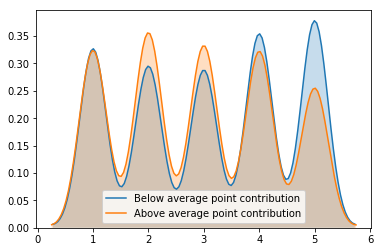

In [10]:
print("Hypothesis Testing")
mn = df['PTS'].mean()
print ("Mean of Points: " + str(mn))

print("Null hypothesis 1: The position of a player does not affect the player's point contribution.")
low = df[df["PTS"] < mn]["PosNum"]
high = df[df["PTS"] >= mn]["PosNum"]
indicators = []
_, p_value = stats.ttest_ind(a=low, b=high, equal_var=False)
print("p_value = " + str(p_value))
if p_value < 0.01:
    print("The null hypothesis has been rejected. The position of a player affects the player's point contribution.")
    indicators.append("PTS")
else:
    print("The null hypothesis cannot be rejected. The position of a player does not affect the player's point contribution.")

ax = sns.kdeplot(low.rename("Below average point contribution"), shade=True)
sns.kdeplot(high.rename("Above average point contribution"), ax=ax, shade=True)

plt.show()


Mean of Assists: 107.23733364464161
Null hypothesis 2: The position of a player does not affect the assists made by the player.
p_value = 0.0
The null hypothesis has been rejected. The position of a player affects the assists made by the player.


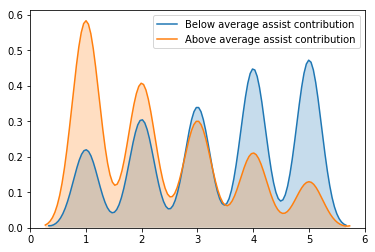

In [11]:
mn = df['AST'].mean()
print ("Mean of Assists: " + str(mn))
print("Null hypothesis 2: The position of a player does not affect the assists made by the player.")
low = df[df["AST"] < mn]["PosNum"]
high = df[df["AST"] >= mn]["PosNum"]
_, p_value = stats.ttest_ind(a=low, b=high, equal_var=False)
print("p_value = " + str(p_value))
if p_value < 0.01:
    print("The null hypothesis has been rejected. The position of a player affects the assists made by the player.")
    indicators.append("AST")
else:
    print("The null hypothesis cannot be rejected. The position of a player does not affect the assists made by the player.")
    print("The null hypothesis cannot be rejected. The position of a player does not affect the player's point contribution.")

ax = sns.kdeplot(low.rename("Below average assist contribution"), shade=True)
sns.kdeplot(high.rename("Above average assist contribution"), ax=ax, shade=True)

plt.show()


Mean of Steals: 37.663144991828155
Null hypothesis 3: The position of a player does not affect the steals made by the player.
p_value = 3.017214060379545e-130
The null hypothesis has been rejected. The position of a player affects the steals made by the player.


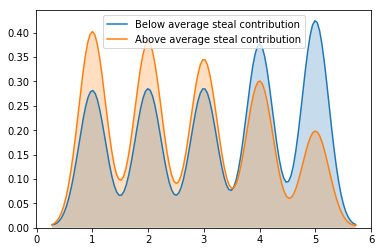

In [12]:
mn = df['STL'].mean()
print ("Mean of Steals: " + str(mn))
print("Null hypothesis 3: The position of a player does not affect the steals made by the player.")
low = df[df["STL"] < mn]["PosNum"]
high = df[df["STL"] >= mn]["PosNum"]
_, p_value = stats.ttest_ind(a=low, b=high, equal_var=False)
print("p_value = " + str(p_value))
if p_value < 0.01:
    print("The null hypothesis has been rejected. The position of a player affects the steals made by the player.")
    indicators.append("STL")
else:
    print("The null hypothesis cannot be rejected. The position of a player does not affect the steals made by the player.")

ax = sns.kdeplot(low.rename("Below average steal contribution"), shade=True)
sns.kdeplot(high.rename("Above average steal contribution"), ax=ax, shade=True)

plt.show()


Mean of Blocks: 23.578332944197992
Null hypothesis 4: The position of a player does not affect the blocks made by the player.
p_value = 0.0
The null hypothesis has been rejected. The position of a player affects the blocks made by the player.


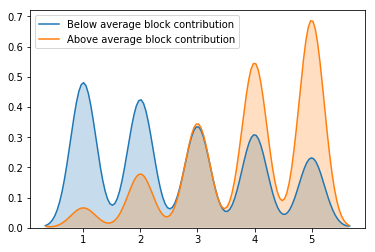

In [13]:
mn = df['BLK'].mean()
print ("Mean of Blocks: " + str(mn))
print("Null hypothesis 4: The position of a player does not affect the blocks made by the player.")
low = df[df["BLK"] < mn]["PosNum"]
high = df[df["BLK"] >= mn]["PosNum"]
_, p_value = stats.ttest_ind(a=low, b=high, equal_var=False)
print("p_value = " + str(p_value))
if p_value < 0.01:
    print("The null hypothesis has been rejected. The position of a player affects the blocks made by the player.")
    indicators.append("BLK")
else:
    print("The null hypothesis cannot be rejected. The position of a player does not affect the blocks made by the player.")

ax = sns.kdeplot(low.rename("Below average block contribution"), shade=True)
sns.kdeplot(high.rename("Above average block contribution"), ax=ax, shade=True)

plt.show()

Mean of Free Throw Accuracy: 0.6906626196591167
Null hypothesis 5: The position of a player does not affect the player's free throw accuracy.
p_value = 5.077477769459807e-298
The null hypothesis has been rejected. The position of a player affects the player's free throw accuracy.


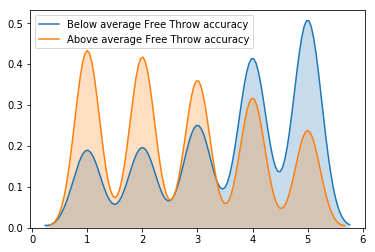

In [14]:
mn = df['FT%'].mean()
print ("Mean of Free Throw Accuracy: " + str(mn))
print("Null hypothesis 5: The position of a player does not affect the player's free throw accuracy.")
low = df[df["FT%"] < mn]["PosNum"]
high = df[df["FT%"] >= mn]["PosNum"]
_, p_value = stats.ttest_ind(a=low, b=high, equal_var=False)
print("p_value = " + str(p_value))
if p_value < 0.01:
    print("The null hypothesis has been rejected. The position of a player affects the player's free throw accuracy.")
    indicators.append("FT%")
else:
    print("The null hypothesis cannot be rejected. The position of a player does not affect the player's free throw accuracy.")
ax = sns.kdeplot(low.rename("Below average Free Throw accuracy"), shade=True)
sns.kdeplot(high.rename("Above average Free Throw accuracy"), ax=ax, shade=True)

plt.show()

Mean of 2 Point Accuracy: 0.4521282979220178
Null hypothesis 6: The position of a player does not affect the player's 2P accuracy.
p_value = 2.5008538307292076e-97
The null hypothesis has been rejected. The position of a player affects the player's 2P accuracy.


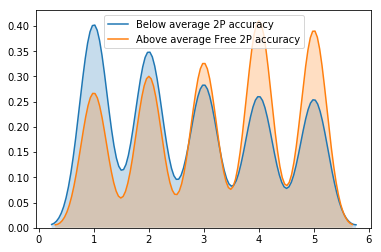

In [15]:
mn = df['2P%'].mean()
print ("Mean of 2 Point Accuracy: " + str(mn))
print("Null hypothesis 6: The position of a player does not affect the player's 2P accuracy.")
low = df[df["2P%"] < mn]["PosNum"]
high = df[df["2P%"] >= mn]["PosNum"]
_, p_value = stats.ttest_ind(a=low, b=high, equal_var=False)
print("p_value = " + str(p_value))
if p_value < 0.01:
    print("The null hypothesis has been rejected. The position of a player affects the player's 2P accuracy.")
    indicators.append("2P%")
else:
    print("The null hypothesis cannot be rejected. The position of a player does not affect the player's 2P accuracy.")
ax = sns.kdeplot(low.rename("Below average 2P accuracy"), shade=True)
sns.kdeplot(high.rename("Above average Free 2P accuracy"), ax=ax, shade=True)

plt.show()

Mean of 3 Point Accuracy: 0.2101590007004455
Null hypothesis 7: The position of a player does not affect the player's 3P accuracy.
p_value = 0.0
The null hypothesis has been rejected. The position of a player affects the player's 3P accuracy.


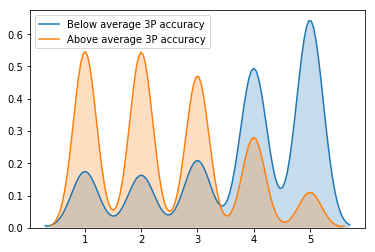

In [16]:
mn = df['3P%'].mean()
print ("Mean of 3 Point Accuracy: " + str(mn))
print("Null hypothesis 7: The position of a player does not affect the player's 3P accuracy.")
low = df[df["3P%"] < mn]["PosNum"]
high = df[df["3P%"] >= mn]["PosNum"]
_, p_value = stats.ttest_ind(a=low, b=high, equal_var=False)
print("p_value = " + str(p_value))
if p_value < 0.01:
    print("The null hypothesis has been rejected. The position of a player affects the player's 3P accuracy.")
    indicators.append("3P%")
else:
    print("The null hypothesis cannot be rejected. The position of a player does not affect the player's 3P accuracy.")
ax = sns.kdeplot(low.rename("Below average 3P accuracy"), shade=True)
sns.kdeplot(high.rename("Above average 3P accuracy"), ax=ax, shade=True)

plt.show()

Mean of Offensive Rebounds: 57.88804576231613
Null hypothesis 8: The position of a player does not affect the offensive rebounds made by the player.
p_value = 0.0
The null hypothesis has been rejected. The position of a player affects the offensive rebounds made by the player.


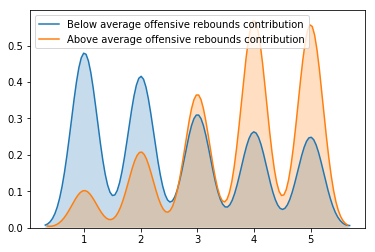

In [17]:
mn = df['ORB'].mean()
print ("Mean of Offensive Rebounds: " + str(mn))
print("Null hypothesis 8: The position of a player does not affect the offensive rebounds made by the player.")
low = df[df["ORB"] < mn]["PosNum"]
high = df[df["ORB"] >= mn]["PosNum"]
_, p_value = stats.ttest_ind(a=low, b=high, equal_var=False)
print("p_value = " + str(p_value))
if p_value < 0.01:
    print("The null hypothesis has been rejected. The position of a player affects the offensive rebounds made by the player.")
    indicators.append("ORB")
else:
    print("The null hypothesis cannot be rejected. The position of a player does not affect offensive rebounds made by the player.")
ax = sns.kdeplot(low.rename("Below average offensive rebounds contribution"), shade=True)
sns.kdeplot(high.rename("Above average offensive rebounds contribution"), ax=ax, shade=True)

plt.show()

Mean of Defensive Rebounds: 141.7480737800607
Null hypothesis 9: The position of a player does not affect the defensive rebounds made by the player.
p_value = 2.0961363457287377e-142
The null hypothesis has been rejected. The position of a player affects the defensive rebounds made by the player.


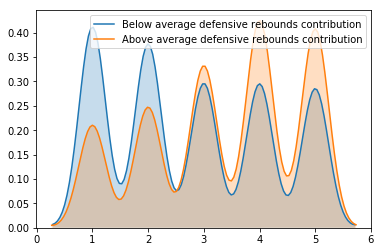

In [18]:
mn = df['DRB'].mean()
print ("Mean of Defensive Rebounds: " + str(mn))
print("Null hypothesis 9: The position of a player does not affect the defensive rebounds made by the player.")
low = df[df["DRB"] < mn]["PosNum"]
high = df[df["DRB"] >= mn]["PosNum"]
_, p_value = stats.ttest_ind(a=low, b=high, equal_var=False)
print("p_value = " + str(p_value))
if p_value < 0.01:
    print("The null hypothesis has been rejected. The position of a player affects the defensive rebounds made by the player.")
    indicators.append("DRB")
else:
    print("The null hypothesis cannot be rejected. The position of a player does not affect the defensive rebounds made by the player.")
ax = sns.kdeplot(low.rename("Below average defensive rebounds contribution"), shade=True)
sns.kdeplot(high.rename("Above average defensive rebounds contribution"), ax=ax, shade=True)

plt.show()

Mean of Minutes Played: 1142.2563623628298
Null hypothesis 10: The position of a player does not affect the minutes played by the player.
p_value = 9.388473462478887e-11
The null hypothesis has been rejected. The position of a player affects the minutes played by the player.


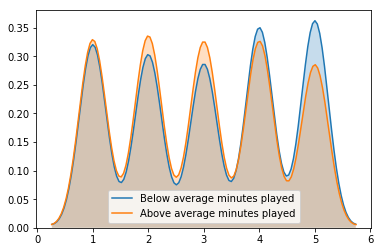

In [19]:
mn = df['MP'].mean()
print ("Mean of Minutes Played: " + str(mn))
print("Null hypothesis 10: The position of a player does not affect the minutes played by the player.")
low = df[df["MP"] < mn]["PosNum"]
high = df[df["MP"] >= mn]["PosNum"]
_, p_value = stats.ttest_ind(a=low, b=high, equal_var=False)
print("p_value = " + str(p_value))
if p_value < 0.01:
    print("The null hypothesis has been rejected. The position of a player affects the minutes played by the player.")
    indicators.append("MP")
else:
    print("The null hypothesis cannot be rejected. The position of a player does not affect the minutes played by the player.")
ax = sns.kdeplot(low.rename("Below average minutes played"), shade=True)
sns.kdeplot(high.rename("Above average minutes played"), ax=ax, shade=True)

plt.show()

Mean of Turnovers: 69.50140088722858
Null hypothesis 11: The position of a player does not affect the turnovers made by the player.
p_value = 5.334274604012322e-30
The null hypothesis has been rejected. The position of a player affects the turnovers made by the player.


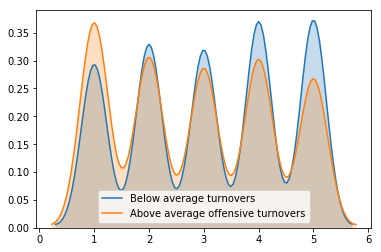

In [20]:
mn = df['TOV'].mean()
print ("Mean of Turnovers: " + str(mn))
print("Null hypothesis 11: The position of a player does not affect the turnovers made by the player.")
low = df[df["TOV"] < mn]["PosNum"]
high = df[df["TOV"] >= mn]["PosNum"]
_, p_value = stats.ttest_ind(a=low, b=high, equal_var=False)
print("p_value = " + str(p_value))
if p_value < 0.01:
    print("The null hypothesis has been rejected. The position of a player affects the turnovers made by the player.")
    indicators.append("TOV")
else:
    print("The null hypothesis cannot be rejected. The position of a player does not affect the turnovers made by the player.")
ax = sns.kdeplot(low.rename("Below average turnovers"), shade=True)
sns.kdeplot(high.rename("Above average offensive turnovers"), ax=ax, shade=True)

plt.show()

Mean of Field Goal Attempts: 391.06782628998366
Null hypothesis 12: The position of a player does not affect the field goal attempts made by the player.
p_value = 2.001140089397474e-34
The null hypothesis has been rejected. The position of a player affects the field goal attempts made by the player.


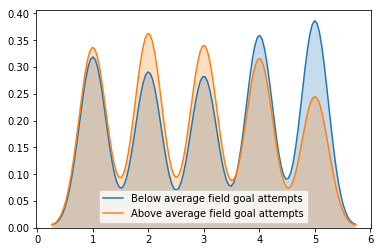

In [21]:
mn = df['FGA'].mean()
print ("Mean of Field Goal Attempts: " + str(mn))
print("Null hypothesis 12: The position of a player does not affect the field goal attempts made by the player.")
low = df[df["FGA"] < mn]["PosNum"]
high = df[df["FGA"] >= mn]["PosNum"]
_, p_value = stats.ttest_ind(a=low, b=high, equal_var=False)
print("p_value = " + str(p_value))
if p_value < 0.01:
    print("The null hypothesis has been rejected. The position of a player affects the field goal attempts made by the player.")
    indicators.append("FGA")
else:
    print("The null hypothesis cannot be rejected. The position of a player does not affect the field goal attempts made by the player.")
ax = sns.kdeplot(low.rename("Below average field goal attempts"), shade=True)
sns.kdeplot(high.rename("Above average field goal attempts"), ax=ax, shade=True)

plt.show()

In [22]:
print("The list of indicators that passed the statistical analysis phase of the project are:")
print(indicators)
indicators.append("PosNum")

The list of indicators that passed the statistical analysis phase of the project are:
['PTS', 'AST', 'STL', 'BLK', 'FT%', '2P%', '3P%', 'ORB', 'DRB', 'MP', 'TOV', 'FGA']


In [23]:
print("Single Linear Regression Model for Prediction")
df_lr = df[indicators]
target_lr = df["PosNum"]
df_lr.head(9999)

Single Linear Regression Model for Prediction


,PTS,AST,STL,BLK,FT%,2P%,3P%,ORB,DRB,MP,TOV,FGA,PosNum
0,1735,249,63,162,0.732,0.600,0.000,162,460,2630,197,1207,5
1,1202,308,115,48,0.883,0.520,0.000,153,347,2136,197,915,4
2,2055,249,60,24,0.759,0.517,0.318,188,289,2699,253,1569,3
3,971,399,122,6,0.868,0.549,0.268,76,192,2564,149,792,2
4,377,36,15,15,0.733,0.479,0.000,87,183,1114,72,337,5
5,149,21,29,9,0.600,0.415,0.000,29,53,457,32,149,3
6,210,34,9,7,0.820,0.430,0.500,39,49,520,34,195,3
7,804,697,129,5,0.749,0.502,0.115,54,237,2401,207,693,1
8,385,39,30,50,0.676,0.448,0.000,122,222,1297,100,349,4
9,1212,138,51,105,0.842,0.490,1.000,153,372,2481,152,1034,4


In [24]:
# Importing the necessary modules for Linear Regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

lr = linear_model.LinearRegression()
target_lr.head()

0    5
1    4
2    3
3    2
4    5
Name: PosNum, dtype: int32

In [25]:
X = df_lr.drop("PosNum", axis=1)
y = df_lr["PosNum"]

# Split X and y into X_
# %10 test, %90 train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

In [26]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
lr.coef_

array([ 5.23966224e-04, -3.45259501e-03, -6.23413498e-03,  4.54043215e-03,
       -5.67741437e-01,  7.58559671e-01, -1.76484588e+00,  3.70373496e-03,
        3.80984837e-03, -1.70377708e-04, -1.14264982e-03, -4.32876760e-04])

In [28]:
lr.intercept_

3.3797798784154427

In [29]:
# Creating a for loop to check coefficients of features
for index, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[index]))

The coefficient for PTS is 0.0005239662244475617
The coefficient for AST is -0.0034525950085159073
The coefficient for STL is -0.006234134982810817
The coefficient for BLK is 0.004540432151971988
The coefficient for FT% is -0.56774143696108
The coefficient for 2P% is 0.7585596709129421
The coefficient for 3P% is -1.764845884743553
The coefficient for ORB is 0.003703734956509514
The coefficient for DRB is 0.0038098483688048124
The coefficient for MP is -0.00017037770825331639
The coefficient for TOV is -0.0011426498173820287
The coefficient for FGA is -0.00043287676044569226


In [30]:
score = lr.score(X_test, y_test)
print("Evaluation of the model")
print("Score: " + str(score))

Evaluation of the model
Score: 0.5309691655629694


In [31]:
from sklearn.metrics import mean_squared_error

y_predict = lr.predict(X_test)

lr_mse = mean_squared_error(y_predict, y_test)

print("Mean Square Error: " + str(lr_mse))

Mean Square Error: 0.9490803482069716


In [32]:
print("From the accuracy of the model we can see that linear regression doesn't fit our data.")

From the accuracy of the model we can see that linear regression doesn't fit our data.


In [33]:
print("Phase 3: Building Machine Learning Models")

Phase 3: Building Machine Learning Models


In [34]:
print("For the first model, we opted to use the Random Forest Supervised Learning Algorithm to predict player positions.")

For the first model, we opted to use the Random Forest Supervised Learning Algorithm to predict player positions.


In [35]:
X = df_lr.iloc[:, df_lr.columns != 'PosNum']
y = df_lr.iloc[:, df_lr.columns == 'PosNum']

# 90% for training and 10% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.10, random_state = 42)

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf  = RandomForestClassifier(random_state = 42)

In [49]:
import warnings
warnings.filterwarnings("ignore")

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [50]:
pred_rf = rf.predict(X_test)

In [51]:
# Checking the performance of the model with accuracy score;
from sklearn import metrics

print("Accuracy of the random forest model: ",metrics.accuracy_score(y_test, pred_rf))

Accuracy of the random forest model:  0.5997666277712952


In [52]:
rf.feature_importances_

array([0.06385237, 0.14709957, 0.07821843, 0.09037687, 0.06583144,
       0.06012315, 0.08392283, 0.10254103, 0.10038884, 0.07668923,
       0.06089185, 0.07006439])

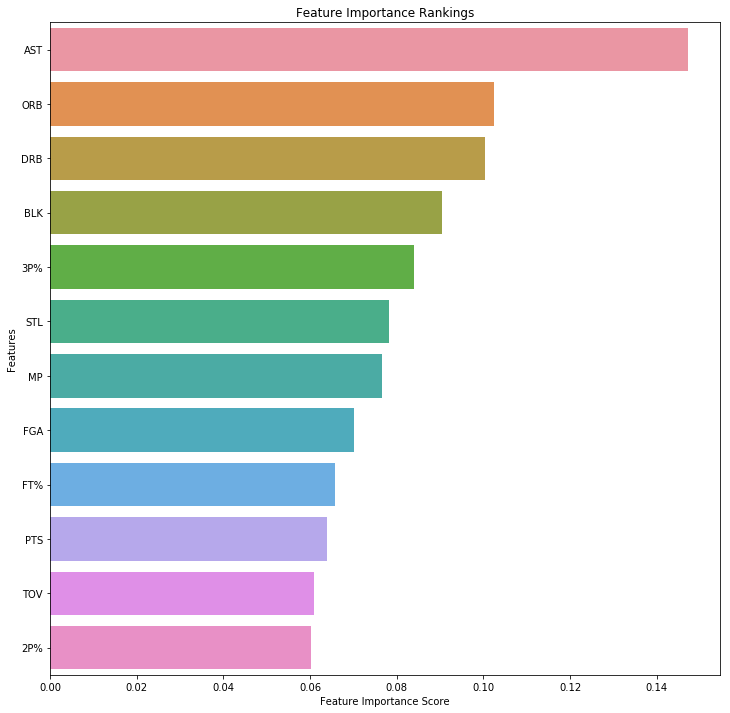

In [53]:
# Creating a bar plot for feature importances

# Firstly creating a Pandas Series to match feature importances values and their indices, also sorting them in decreasing order
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importances, y=feature_importances.index)

# Add labels to our graph  
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings")
plt.show()

In [54]:
print("For this one we try to guess who is mvp by player's stats using logistic regression.")
df_mvp = df.drop(["Player", "Pos", "Tm"], axis=1)
features = df_mvp.iloc[:, df_mvp.columns != 'MVP']
target = df_mvp.iloc[:, df_mvp.columns == 'MVP']


For this one we try to guess who is mvp by player's stats using logistic regression.


In [55]:
df_mvp.head()

,index,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MVP,PosNum
0,0,1985,37,79,79,2630,22.9,0.628,0.001,0.327,...,460,622,249,63,162,197,238,1735,0,5
1,1,1985,30,82,69,2136,19.8,0.578,0.000,0.309,...,347,500,308,115,48,197,254,1202,0,4
2,2,1985,25,80,79,2699,21.3,0.563,0.054,0.370,...,289,477,249,60,24,253,250,2055,0,3
3,3,1985,25,75,73,2564,14.2,0.570,0.071,0.172,...,192,268,399,122,6,149,228,971,0,2
4,4,1985,25,74,4,1114,9.1,0.509,0.003,0.223,...,183,270,36,15,15,72,171,377,0,5


In [56]:
from sklearn.feature_selection import SelectKBest  # selection method
from sklearn.feature_selection import f_classif    # univariate test

In [57]:
selector = SelectKBest(f_classif, k=49)  # test method and number of attributes
selected_attr = selector.fit_transform(features, target)
selected_attr

array([[0.0000e+00, 1.9850e+03, 3.7000e+01, ..., 2.3800e+02, 1.7350e+03,
        5.0000e+00],
       [1.0000e+00, 1.9850e+03, 3.0000e+01, ..., 2.5400e+02, 1.2020e+03,
        4.0000e+00],
       [2.0000e+00, 1.9850e+03, 2.5000e+01, ..., 2.5000e+02, 2.0550e+03,
        3.0000e+00],
       ...,
       [1.7129e+04, 2.0170e+03, 2.0000e+01, ..., 1.7000e+01, 2.3000e+01,
        5.0000e+00],
       [1.7130e+04, 2.0170e+03, 2.2000e+01, ..., 7.8000e+01, 2.4000e+02,
        3.0000e+00],
       [1.7131e+04, 2.0170e+03, 1.9000e+01, ..., 6.6000e+01, 2.8400e+02,
        5.0000e+00]])

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [64]:
# dividing the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [65]:
# create the model
clf = LogisticRegression()

In [66]:
# training the model
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

y_pred = clf.predict(X_test)
print("accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print()
print("confusion matrix")
print(confusion_matrix(y_test, y_pred))

accuracy score: 0.9968164131588256

confusion matrix
[[5634   11]
 [   7    2]]


In [70]:
clf.predict_proba(X_test)

array([[9.99986095e-01, 1.39054762e-05],
       [9.99713553e-01, 2.86446841e-04],
       [9.99972806e-01, 2.71944782e-05],
       ...,
       [9.99898925e-01, 1.01074520e-04],
       [9.99879439e-01, 1.20561272e-04],
       [9.99912313e-01, 8.76871035e-05]])

In [72]:
print("In this model, we have tried to predict the MVPs in the past NBA seasons by using logistic regression.\nThis was the model we opted to use, because we have encoded the MVP data as binary and logistic regression works well for binary targets.\nAlthough we have a high accuracy with this model, we think that it may be caused by our dataset. We have the data of each player from seasons 1985 - 2017 and there are only 33 MVPs.\nThis causes most of the 0s(not MVP) to be predicted accurately and that significantly increases our accuracy.")

In this model, we have tried to predict the MVPs in the past NBA seasons by using logistic regression.
This was the model we opted to use, because we have encoded the MVP data as binary and logistic regression works well for binary targets.
Although we have a high accuracy with this model, we think that it may be caused by our dataset. We have the data of each player from seasons 1985 - 2017 and there are only 33 MVPs.
This causes most of the 0s(not MVP) to be predicted accurately and that significantly increases our accuracy.


In [73]:
print("Thus, we think that the Random Forest Algorithm we built to predict the player positions is more succesfull.")

Thus, we think that the Random Forest Algorithm we built to predict the player positions is more succesfull.
